In [162]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import metrics

# Logistic Regression regularization

**W sklearnie za regularyzację odpowiada parametr C i jest on odwrotnoscią parametru $\lambda$, tzn. $C = \frac{1}{\lambda}$. Zatem im mniejsze C, tym silniejsza regularyzacja.**

In [163]:
from sklearn import datasets
iris = datasets.load_iris()
list(iris.keys())

['data',
 'target',
 'frame',
 'target_names',
 'DESCR',
 'feature_names',
 'filename',
 'data_module']

# 1D - example

Spróbujmy zbudować klasyfikator wykrywający typ Iris-Virginica oparty tylko na funkcji szerokości płatka (jedna wspórzędna).

In [164]:
X = iris["data"][:, 3:]  # petal width
y = (iris["target"] == 2).astype(np.int32)  # 1 if Iris-Virginica, else 0

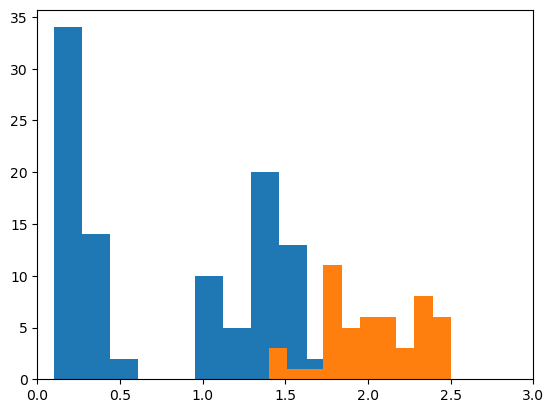

In [165]:
plt.hist(X[y==0, :])
plt.hist(X[y==1, :])
plt.xlim(0,3)
plt.show()

# Zad

Wykonaj algorytm LogisticRegression z 
* C = 1

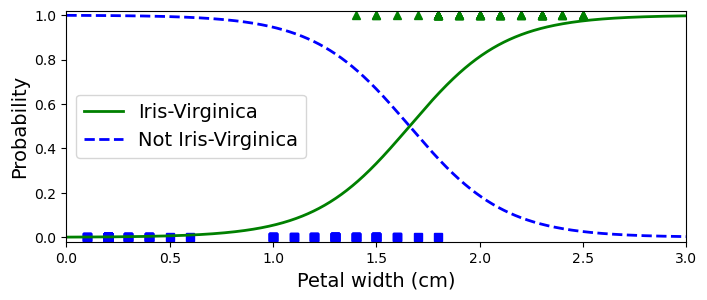

In [166]:
from sklearn.linear_model import LogisticRegression
log_reg_1 = LogisticRegression(C = 1, random_state=42)
log_reg_1.fit(X, y)

X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba_1 = log_reg_1.predict_proba(X_new)


plt.figure(figsize=(8, 3))
plt.plot(X[y==0], y[y==0], "bs")
plt.plot(X[y==1], y[y==1], "g^")
plt.plot(X_new, y_proba_1[:, 1], "g-", linewidth=2, label="Iris-Virginica")
plt.plot(X_new, y_proba_1[:, 0], "b--", linewidth=2, label="Not Iris-Virginica")
plt.xlabel("Petal width (cm)", fontsize=14)
plt.ylabel("Probability", fontsize=14)
plt.legend(loc="center left", fontsize=14)
plt.axis([0, 3, -0.02, 1.02])
plt.show()

# Zad

Wykonaj algorytm LogisticRegression z 
* C = 10

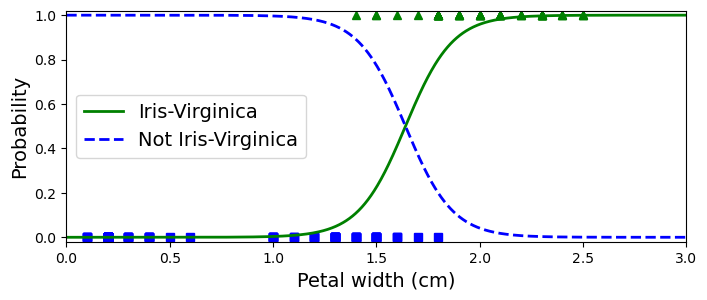

In [167]:
log_reg_10 = LogisticRegression(C = 10, random_state=42)
log_reg_10.fit(X, y)

y_proba_10 = log_reg_10.predict_proba(X_new)

plt.figure(figsize=(8, 3))
plt.plot(X[y==0], y[y==0], "bs")
plt.plot(X[y==1], y[y==1], "g^")
plt.plot(X_new, y_proba_10[:, 1], "g-", linewidth=2, label="Iris-Virginica")
plt.plot(X_new, y_proba_10[:, 0], "b--", linewidth=2, label="Not Iris-Virginica")
plt.xlabel("Petal width (cm)", fontsize=14)
plt.ylabel("Probability", fontsize=14)
plt.legend(loc="center left", fontsize=14)
plt.axis([0, 3, -0.02, 1.02])
plt.show()

# Zad

Wykonaj algorytm LogisticRegression z 
* C = 100

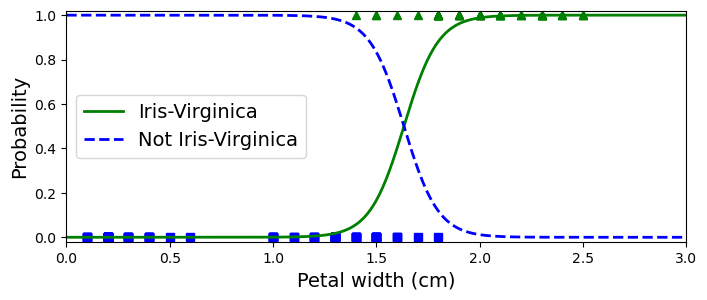

In [168]:
log_reg_100 = LogisticRegression(C = 100, random_state=42)
log_reg_100.fit(X, y)

y_proba_100 = log_reg_100.predict_proba(X_new)


plt.figure(figsize=(8, 3))
plt.plot(X[y==0], y[y==0], "bs")
plt.plot(X[y==1], y[y==1], "g^")
plt.plot(X_new, y_proba_100[:, 1], "g-", linewidth=2, label="Iris-Virginica")
plt.plot(X_new, y_proba_100[:, 0], "b--", linewidth=2, label="Not Iris-Virginica")
plt.xlabel("Petal width (cm)", fontsize=14)
plt.ylabel("Probability", fontsize=14)
plt.legend(loc="center left", fontsize=14)
plt.axis([0, 3, -0.02, 1.02])
plt.show()

# Zad

Narysuj wszystkie funkcje na jednym wykresie.

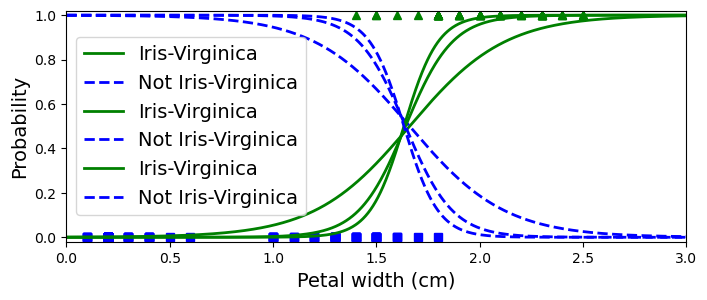

In [169]:
plt.figure(figsize=(8, 3))
plt.plot(X[y==0], y[y==0], "bs")
plt.plot(X[y==1], y[y==1], "g^")
plt.plot(X_new, y_proba_1[:, 1], "g-", linewidth=2, label="Iris-Virginica")
plt.plot(X_new, y_proba_1[:, 0], "b--", linewidth=2, label="Not Iris-Virginica")
plt.plot(X_new, y_proba_10[:, 1], "g-", linewidth=2, label="Iris-Virginica")
plt.plot(X_new, y_proba_10[:, 0], "b--", linewidth=2, label="Not Iris-Virginica")
plt.plot(X_new, y_proba_100[:, 1], "g-", linewidth=2, label="Iris-Virginica")
plt.plot(X_new, y_proba_100[:, 0], "b--", linewidth=2, label="Not Iris-Virginica")
plt.xlabel("Petal width (cm)", fontsize=14)
plt.ylabel("Probability", fontsize=14)
plt.legend(loc="center left", fontsize=14)
plt.axis([0, 3, -0.02, 1.02])
plt.show()

# Example 2D

In [170]:
X = iris["data"][:, (2, 3)]  # petal length, petal width
y = (iris["target"] == 2).astype(np.int32)

# Zad

Wykonaj algorytm LogisticRegression z 
* C = 1

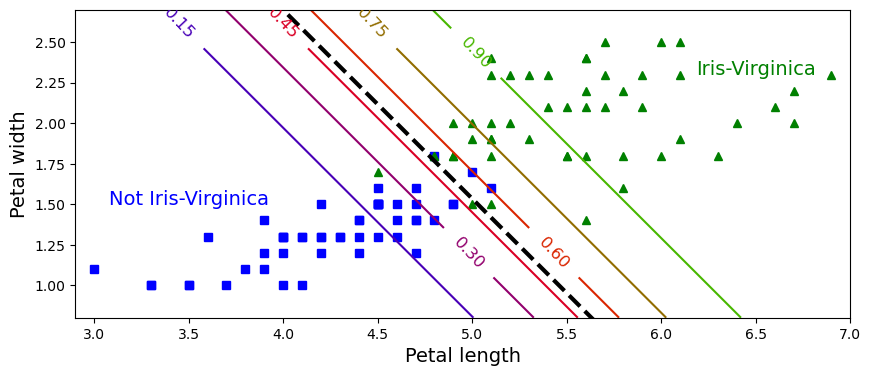

In [171]:
log_reg_1 = LogisticRegression(C=1, random_state=42)
log_reg_1.fit(X, y)

x0, x1 = np.meshgrid(
        np.linspace(2.9, 7, 500).reshape(-1, 1),
        np.linspace(0.8, 2.7, 200).reshape(-1, 1),
    )
X_new = np.c_[x0.ravel(), x1.ravel()]

y_proba_1 = log_reg_1.predict_proba(X_new)

plt.figure(figsize=(10, 4))
plt.plot(X[y==0, 0], X[y==0, 1], "bs")
plt.plot(X[y==1, 0], X[y==1, 1], "g^")

zz_1 = y_proba_1[:, 1].reshape(x0.shape)
contour_1 = plt.contour(x0, x1, zz_1, cmap=plt.cm.brg)


left_right = np.array([2.9, 7])
boundary_1 = -(log_reg_1.coef_[0][0] * left_right + log_reg_1.intercept_[0]) / log_reg_1.coef_[0][1]

plt.clabel(contour_1, inline=1, fontsize=12)
plt.plot(left_right, boundary_1, "k--", linewidth=3)
plt.text(3.5, 1.5, "Not Iris-Virginica", fontsize=14, color="b", ha="center")
plt.text(6.5, 2.3, "Iris-Virginica", fontsize=14, color="g", ha="center")
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.axis([2.9, 7, 0.8, 2.7])

plt.show()

# Zad

Wykonaj algorytm LogisticRegression z 
* C = 10

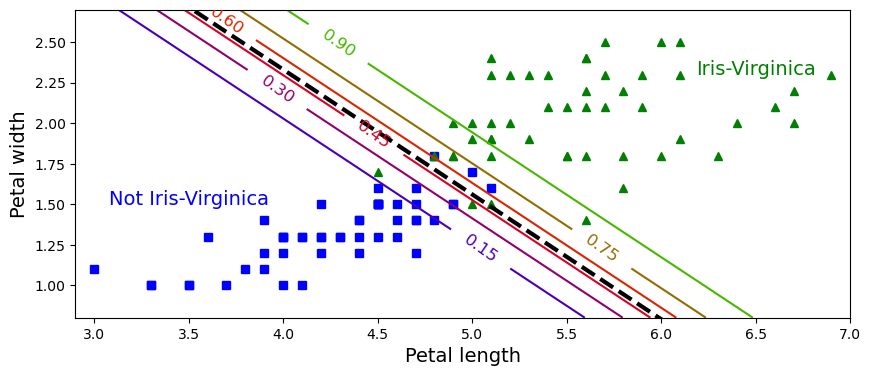

In [172]:
log_reg_10 = LogisticRegression(C=10, random_state=42)
log_reg_10.fit(X, y)

y_proba_10 = log_reg_10.predict_proba(X_new)

plt.figure(figsize=(10, 4))
plt.plot(X[y==0, 0], X[y==0, 1], "bs")
plt.plot(X[y==1, 0], X[y==1, 1], "g^")

zz_10 = y_proba_10[:, 1].reshape(x0.shape)
contour_10 = plt.contour(x0, x1, zz_10, cmap=plt.cm.brg)

boundary_10 = -(log_reg_10.coef_[0][0] * left_right + log_reg_10.intercept_[0]) / log_reg_10.coef_[0][1]

plt.clabel(contour_10, inline=1, fontsize=12)
plt.plot(left_right, boundary_10, "k--", linewidth=3)
plt.text(3.5, 1.5, "Not Iris-Virginica", fontsize=14, color="b", ha="center")
plt.text(6.5, 2.3, "Iris-Virginica", fontsize=14, color="g", ha="center")
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.axis([2.9, 7, 0.8, 2.7])

plt.show()

# Zad

Wykonaj algorytm LogisticRegression z 
* C = 100

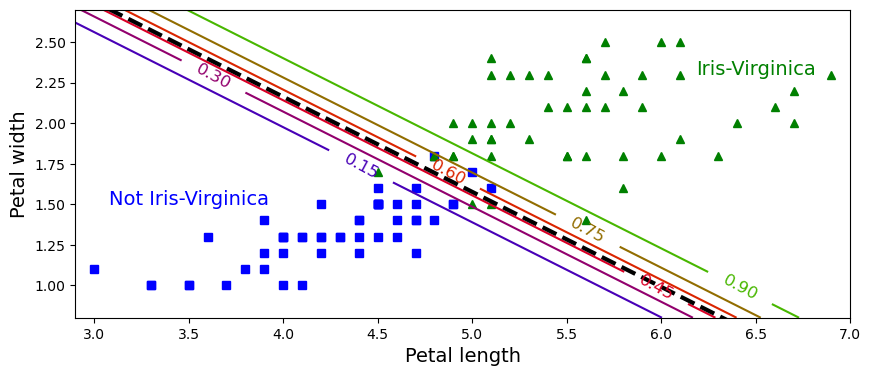

In [173]:
log_reg_100 = LogisticRegression(C=100, random_state=42)
log_reg_100.fit(X, y)

y_proba_100 = log_reg_100.predict_proba(X_new)

plt.figure(figsize=(10, 4))
plt.plot(X[y==0, 0], X[y==0, 1], "bs")
plt.plot(X[y==1, 0], X[y==1, 1], "g^")

zz_100 = y_proba_100[:, 1].reshape(x0.shape)
contour_100 = plt.contour(x0, x1, zz_100, cmap=plt.cm.brg)

boundary_100 = -(log_reg_100.coef_[0][0] * left_right + log_reg_100.intercept_[0]) / log_reg_100.coef_[0][1]

plt.clabel(contour_100, inline=1, fontsize=12)
plt.plot(left_right, boundary_100, "k--", linewidth=3)
plt.text(3.5, 1.5, "Not Iris-Virginica", fontsize=14, color="b", ha="center")
plt.text(6.5, 2.3, "Iris-Virginica", fontsize=14, color="g", ha="center")
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.axis([2.9, 7, 0.8, 2.7])

plt.show()

# Zad

Narysuj wszystkie funkcje na jednym wykresie.

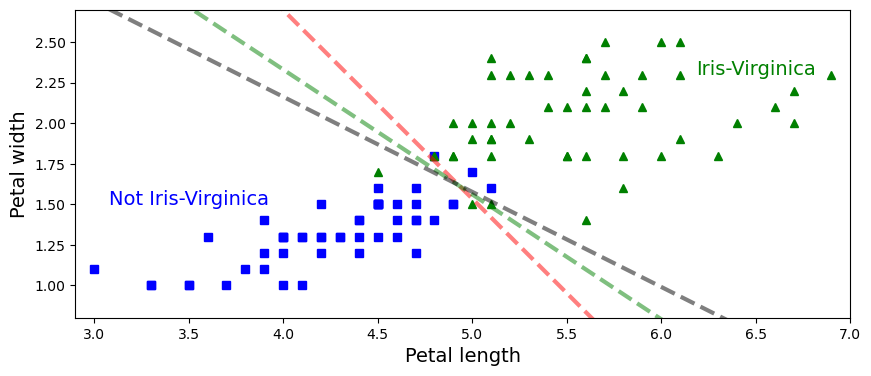

In [174]:
plt.figure(figsize=(10, 4))
plt.plot(X[y==0, 0], X[y==0, 1], "bs")
plt.plot(X[y==1, 0], X[y==1, 1], "g^")

plt.clabel(contour_1, inline=1, fontsize=12)
plt.plot(left_right, boundary_1, "r--", linewidth=3, alpha=0.5)

plt.clabel(contour_10, inline=1, fontsize=12)
plt.plot(left_right, boundary_10, "g--", linewidth=3, alpha=0.5)

plt.clabel(contour_100, inline=1, fontsize=12)
plt.plot(left_right, boundary_100, "k--", linewidth=3, alpha=0.5)

plt.text(3.5, 1.5, "Not Iris-Virginica", fontsize=14, color="b", ha="center")
plt.text(6.5, 2.3, "Iris-Virginica", fontsize=14, color="g", ha="center")
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.axis([2.9, 7, 0.8, 2.7])

plt.show()